# Introduction to NLP Fundematals in TensorFlow
NLP has the goal of deriving information out of natural language(could be sequences text or speech)
Another common term for NLP problems is sequence to squence problems(seq2seq)

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b9603c07-7986-b2db-cabb-621bf3ecbd5b)
GPU 1: Tesla T4 (UUID: GPU-636e3e22-22df-de25-e98e-a2bc1027dd87)


## Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-10-29 04:55:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-10-29 04:55:10 (82.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback,unzip_data,plot_loss_curves,compare_historys

2025-10-29 04:55:12.267600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761713712.526976      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761713712.593534      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Get a text dataset
the dataset we're going to be using is Kaggle's introduction to NLP dataset(text samples of tweets labelled as diaster or not diaster).

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2025-10-29 04:55:25--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 142.251.184.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2025-10-29 04:55:25 (90.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# unzip the data
unzip_data("nlp_getting_started.zip")

In [6]:
import tensorflow as tf
import pandas as pd


In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [8]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
# shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1,random_state=42)

In [10]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [11]:
# what does the tesst dataframe look like
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
# how many examples of each class?
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [13]:
len(train_df),len(test_df)

(7613, 3263)

In [14]:
# Let's visualize some random training examples
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
    _,text,target = row 
    print(f"target: {target}","(real diaster)" if target > 0 else "(not real diaster)" )
    print(f"Text:\n{text}\n")
    print(10*"__","\n")

target: 0 (not real diaster)
Text:
Well unfortunately for my followers stage pics came in today. Advanced apologies for the inundationÛ_ https://t.co/u8hSrtrXMm

____________________ 

target: 1 (real diaster)
Text:
Memorial unveiled for Travis County deputy killed in Sept. flooding: Travis County Sheriff Greg Hamilton joinedÛ_ http://t.co/Eo2F96WXPz

____________________ 

target: 1 (real diaster)
Text:
Now on http://t.co/3sTH9lrBUn: PHOTOS: Flames rage through Manchester buildings in 3-alarm fire http://t.co/jQxM4gcQZ3 #NH1News

____________________ 

target: 0 (not real diaster)
Text:
#Tanzania elephant population declined by 60% in five years census reveals http://t.co/YxtZbTVMhm http://t.co/7jGgqwbv6S

____________________ 

target: 1 (real diaster)
Text:
Elem Pomo helping the displaced from the Rocky Fire. Please consider!
Elem Evacuation Center http://t.co/dYDFvz7amj via @gofundme

____________________ 



### Split data into training and validation datasets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                           test_size=0.1,
                                                                           random_state=42)

In [17]:
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [18]:
# check the first ten samples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into number, machine learning don't know text.
when dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.
There are a few ways to do this, namely:
* *Tokenization* - direct mapping of token (a token could be a word, a character or in between) to number.
* *Embedding* - Create a matrix of feature vector for each token ( the size of the feature vector can be defined and this embedding can be learned)

### Text vecorization(tokenization)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [20]:
text_vectorizer = TextVectorization(max_tokens=None, # how many word in the vocablary (automatically add <OOV>
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words
                                    output_mode="int", # how to map token to number
                                    output_sequence_length=None ,# how long do you want your sequence to be
                                    )

I0000 00:00:1761713726.753955      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761713726.754596      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [21]:
# find the average number of tokens(words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]))/len(train_sentences)

14.901036345059115

In [22]:
# setup  text vectorization variables
max_vocab_length =10000 # max number of words to have in our vocablary
max_length = 15 # max lenght our sequences will be ( e.g how many words from a tweet does a model see?)


In [23]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length
                                   )

In [24]:
# Fit the text vectorizer to the training sentence
text_vectorizer.adapt(train_sentences)

In [25]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [26]:
# Choose a random sentece from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence} \n\nVectorized Version: {text_vectorizer(random_sentence)} ")
text_vectorizer(random_sentence)

Original text:
 Maratha raiders scorched their lands &amp; Punjab refused them food aid during the 1943 famine wonder if Bengalis harbor some 'hard feelings' 

Vectorized Version: [   1 4815 8749  131 5253   35 4831 3484   93  260 2566  246    2 6355
  459] 


<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([   1, 4815, 8749,  131, 5253,   35, 4831, 3484,   93,  260, 2566,
        246,    2, 6355,  459])>

In [27]:
# check if token is a sentence have the same int value across different sentences
sample_sentence_two = "schools are the best Western in Lit lit litterally.. LiTTErALLy.."
text_vectorizer(sample_sentence_two)

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([2718,   22,    2,  149, 1102,    4, 5214, 5214,    1,    1,    0,
          0,    0,    0,    0])>

In [28]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in vocabulary
top_5_words = words_in_vocab[:5] # get the most common word
bottom_5_words = words_in_vocab[-5:] # get the least common word
top_5_words,bottom_5_words,len(words_in_vocab)

(['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'],
 10000)

### Creating and Embedding using an Embedding Layer
To make our embedding, we going to use tensorflow embedding layer
The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector,for example, a value of 100 would mean each token gets represented by a vector 100 long
*  `input_length` = length of the sequences being passed to the embedding layer

In [29]:
 from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                            output_dim=128,
                             input_length=max_length
                            )


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"original text: \n{random_sentence} ")
random_sentence_vectorized = text_vectorizer(random_sentence)
sample_embed = embedding(random_sentence_vectorized)
random_sentence_vectorized,sample_embed

original text: 
Army veteran fears loose rocks from Dundee landslide could kill him at any moment: He has faced a hail of bulletsÛ_ http://t.co/sxmLg3XdvX 


(<tf.Tensor: shape=(15,), dtype=int64, numpy=
 array([ 164, 4316, 1526, 1819, 1999,   20, 3906,  374,  137,  542,  158,
          17,  202, 1005,   56])>,
 <tf.Tensor: shape=(15, 128), dtype=float32, numpy=
 array([[ 0.00191648, -0.0094844 , -0.02074342, ..., -0.04262742,
         -0.02512415,  0.04894865],
        [-0.02654169, -0.042072  , -0.02683955, ...,  0.02910669,
         -0.00142249, -0.03777493],
        [-0.02920645, -0.01936665, -0.0298654 , ...,  0.00091168,
         -0.00170575, -0.02458048],
        ...,
        [-0.04071016, -0.04395929,  0.04702899, ...,  0.04971626,
          0.02201817,  0.01915577],
        [ 0.04615361,  0.01982565, -0.01922562, ...,  0.03731419,
         -0.00875021,  0.0323337 ],
        [-0.03425401,  0.03752628,  0.03323111, ...,  0.02458088,
         -0.04639367,  0.00401976]], dtype=float32)>)

In [31]:
# check out a single token's embedding
sample_embed[0], sample_embed[0].shape,random_sentence_vectorized[14]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 1.91647932e-03, -9.48439911e-03, -2.07434185e-02,  4.77294996e-03,
        -6.14662096e-03,  1.67335756e-02, -1.51897892e-02, -4.62614559e-02,
        -3.67141366e-02,  6.55691698e-03,  2.49695033e-04, -3.55178714e-02,
         1.63815059e-02,  7.75981694e-04, -3.08754295e-03, -4.58970666e-02,
         2.23440416e-02, -2.23296881e-02, -2.64135357e-02, -3.60769145e-02,
        -4.44268957e-02, -2.27168947e-03, -3.64485271e-02, -1.32827163e-02,
        -6.30776957e-03, -2.87881978e-02,  2.05254219e-02,  4.67918776e-02,
        -1.78298354e-02,  2.23101862e-02,  2.13456787e-02, -2.11326610e-02,
         1.66723020e-02,  4.53922898e-03,  1.21701509e-04, -9.77739692e-05,
        -1.03555545e-02, -4.02532592e-02,  1.26757473e-03, -3.37599665e-02,
         1.33706965e-02, -6.58576563e-03,  3.56105678e-02, -2.59225126e-02,
         6.65660948e-03,  3.19454111e-02, -4.67789173e-03, -2.72176396e-02,
        -4.48617004e-02,  2.03251950e-0

## Modeling a text dataset (running a series of experiment)
Now we've a got way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.
we'll start with a baseline and move on from there.

* Model 0: Naive Bayes(baseline)
* Model 1: Feed-Forwared neural Network(dense Model)
* Model 2: LSTM model(RNN)
* Model 3: GRU model(RNN)
* Model 4: Bidirectional-LSTM model(RNN)
* Model 5:1D Convolutional Neural Network(CNN)
* Model 6: TensorFlow Hub pretrained Feature Extractor(using transofer learning for NLP)
* Model 7: same as model 6 with 10% of training data

  How we are going to approach all of these?

  Use the standard steps in modelling with tensorflow:
  * Create a model
  * Build a model
  * Fit a model
  * Evaluate a model
  

### Model 0: Getting a baseline 
As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiment to build on

In [35]:
# !pip install scikit-learn
import sklearn
print(sklearn.__version__)

1.2.2


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [38]:
# Create tokenization and modelling pipeline 
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()), # convert words into numbers using tfidf
    ("clf",MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0_history = model_0.fit(train_sentences,train_labels)

In [39]:
model_0_history

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [40]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences,val_labels)
baseline_score

0.7926509186351706

In [41]:
print(f"Our baseline model achievs an accuracy of: {baseline_score}")
train_df.target.value_counts()

Our baseline model achievs an accuracy of: 0.7926509186351706


target
0    4342
1    3271
Name: count, dtype: int64

In [42]:
# make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:2],val_sentences[:2]

(array([1, 1]),
 array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday'],
       dtype=object))

### Creating an evaluation function for our model experiments
we could evaluate all of our model's predictions with different metrics every time,however, this will be cumbersome and could easily be fixed using function
Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Percision
* Recall
* F1-score

In [43]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true, y_preds):
    """
    Calculates model accuracy, recall, precision and f1-score
    of a binary classification model.
    """
    model_accuracy = accuracy_score(y_true, y_preds) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(
        y_true, y_preds, average="weighted"
    )
    model_results = {
        "accuracy": model_accuracy,
        "precision": model_precision,
        "recall": model_recall,
        "f1": model_f1,
    }
    return model_results


In [66]:
baseline_results = calculate_results(y_true=val_labels,y_preds=baseline_preds)

In [67]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model

In [90]:
# Create a directory to save tensorboard logs
SAVE_DIR = "model_logs"
# Bild model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(),dtype=tf.string,name="input_layer")
x = text_vectorizer(inputs) # turn the input text into number
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D(name="globalAverage_layer")(x)
# x = layers.Flatten()(x)
outputs = layers.Dense(1,activation="sigmoid",name="output_layer")(x)
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")

In [91]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ globalAverage_layer             │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# compile the model
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [93]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                             y=train_labels,
                             epochs=5,
                             validation_data=(val_sentences,val_labels),
                             callbacks=[create_tensorboard_callback("TensorBoard","model_1_dense")])

Saving TensorBoard log files to: TensorBoard/model_1_dense/20251029-063616
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8201 - loss: 0.5703 - val_accuracy: 0.7848 - val_loss: 0.4887
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8858 - loss: 0.3546 - val_accuracy: 0.7887 - val_loss: 0.4573
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9025 - loss: 0.2764 - val_accuracy: 0.7861 - val_loss: 0.4695
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9242 - loss: 0.2211 - val_accuracy: 0.7743 - val_loss: 0.4776
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9347 - loss: 0.1972 - val_accuracy: 0.7835 - val_loss: 0.4975


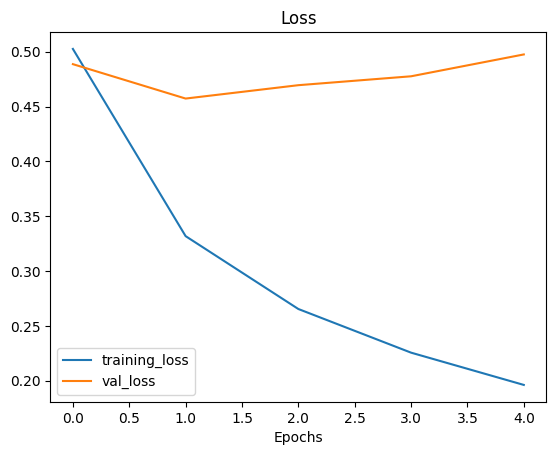

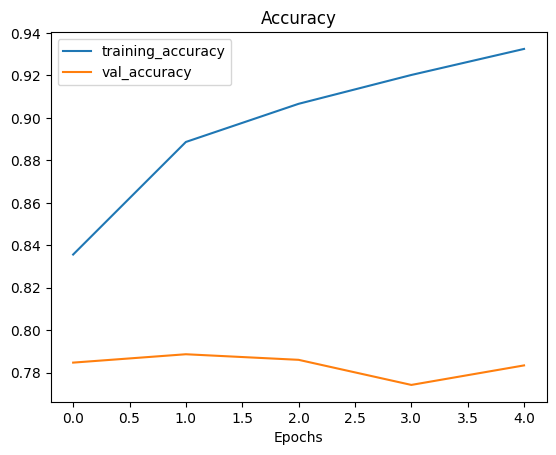

In [94]:
plot_loss_curves(model_1_history)

In [95]:
model_1.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 0.5355


[0.49754881858825684, 0.7834645509719849]

In [103]:
model_1_pred_probs = model_1.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [107]:
model_1_pred_probs.shape,val_sentences[:5],model_1_pred_probs[:5]


((762, 1),
 array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        '@camilacabello97 Internally and externally screaming',
        'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov'],
       dtype=object),
 array([[0.3963174 ],
        [0.83684915],
        [0.9985487 ],
        [0.097127  ],
        [0.0805926 ]], dtype=float32))

In [125]:
# convert model prediction probablity to a label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [126]:
model_1_results = calculate_results(y_true=val_labels,y_preds=model_1_preds)

In [127]:
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7864953185428455,
 'recall': 0.7834645669291339,
 'f1': 0.7810537461695031}

In [130]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [129]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing Learned Embeddings

In [133]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [134]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ globalAverage_layer             │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [156]:
# get the weight metrics of embedding layer
# (these are the numberical representations of each token in our training data, which have been learned for 5 epochs)
print(f"total parameter of embedding weights: {len(embedding.get_weights()[0])}")
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights[:20])
print(f"shape of embedding: {embed_weights.shape} ")

total parameter of embedding weights: 10000
[[ 0.0618798  -0.13022235  0.10774152 ... -0.04532677  0.08770358
   0.08560597]
 [ 0.04412733  0.00896851  0.01679843 ... -0.05154786 -0.01509456
   0.07238658]
 [ 0.04791475 -0.03790115  0.03532025 ...  0.01678537 -0.00660717
   0.01224414]
 ...
 [-0.03737455 -0.04654818 -0.00819984 ... -0.02863489 -0.01864237
   0.02580527]
 [-0.05260177 -0.02927219  0.00501566 ... -0.06112171 -0.01110964
  -0.04736228]
 [-0.04405865  0.00655201  0.02275234 ... -0.00793732 -0.0281791
  -0.00666248]]
shape of embedding: (10000, 128) 


Now we've got the embedding matrix our mdoel has learned to represent our tokens, let's see how we can visualize it.
to do so, TensorFlow as a handy tool called projector.
and tensorflow alos has an incredible guide on word embeddings themselves.

In [ ]:
words_in_vocab

In [158]:
# Create embedding files from tensorflow word embedding docs
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()